# Perform Principal Component Analysis

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [50]:
df = pd.read_csv('history.csv')
sensors = ['MQ2','MQ3','MQ4','MQ6','MQ7','MQ8','MQ135']
df.columns = sensors
df['target'] = 'air'
df.loc[74:119, 'target'] = 'healthy'
df.loc[164:249, 'target'] = 'azotemic'

### Health Urine Graph

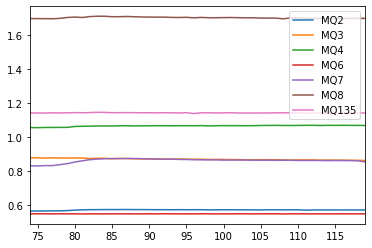

In [51]:
df.loc[74:119].plot()

### Azotemic Urine Graph

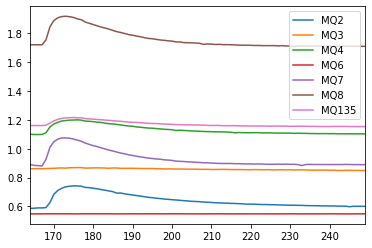

In [52]:
df.loc[164:249].plot()

## PCA Analysis

In [53]:
sensor_values = df.loc[:, sensors].values
target_values = df.loc[:,['target']].values

In [54]:
sensor_values = StandardScaler().fit_transform(sensor_values)
pd.DataFrame(data = sensor_values, columns= sensors).head()

,MQ2,MQ3,MQ4,MQ6,MQ7,MQ8,MQ135
0,-0.096680,3.216499,-2.821858,-2.350677,-3.061404,-2.010780,-2.874490
1,-0.106386,3.274737,-2.797525,-1.230605,-3.052081,-1.982423,-2.812188
2,-0.086712,3.147209,-2.794701,-0.876898,-3.100174,-1.928657,-2.824649
3,-0.217876,2.642625,-2.944173,-0.493716,-3.168687,-2.030744,-3.497512
4,-0.227844,3.157837,-2.762112,-1.613787,-3.150190,-1.826571,-2.781286


In [55]:
pca = PCA(n_components=2)
components = pca.fit_transform(sensor_values)
principalDf = pd.DataFrame(data=components, columns=['pc1', 'pc2'])
principalDf.head(5)

,pc1,pc2
0,-5.965502,-1.069572
1,-5.769758,-0.004437
2,-5.678691,0.292689
3,-5.966563,0.524842
4,-5.790299,-0.376346


In [56]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,pc1,pc2,target
0,-5.965502,-1.069572,air
1,-5.769758,-0.004437,air
2,-5.678691,0.292689,air
3,-5.966563,0.524842,air
4,-5.790299,-0.376346,air


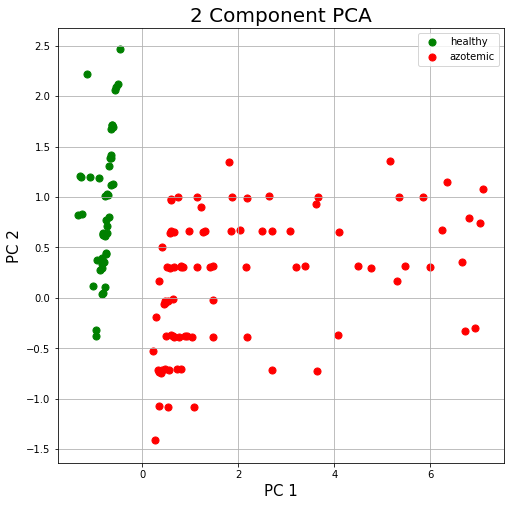

In [58]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['healthy', 'azotemic']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()